## regularization

In [1]:
# import data
import pandas as pd
import numpy as np
def upload_data(filename):
    data = open(filename)
    lst = []
    for line in data.readlines():
        lineMod = line.strip().split(",")
        tmp = []
        for l in lineMod:
            tmp.append(float(l))
        lst.append(tmp)
    data = pd.DataFrame(np.array(lst), columns = ["X_1", 'X_2', 'Y'])
    data.insert(loc = 0, value = np.array([1]*len(lst)), column = 'X_0')
    return data

data = upload_data("/Users/mac/Desktop/MLcoursework/ex2-week3-logistic regression/ex2/ex2data2.txt")

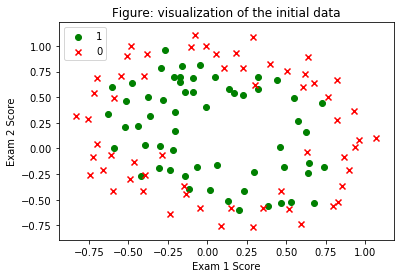

In [2]:
# visualize the initial data
from matplotlib import pyplot as plt
Y_positive = data[data['Y']==1]
Y_negative = data[data['Y']==0]
plt.scatter(Y_positive['X_1'], Y_positive['X_2'], marker = 'o', color = "green", label = '1')
plt.scatter(Y_negative['X_1'], Y_negative['X_2'], marker = 'x', color = "red", label = '0')
plt.legend(loc = 'upper left')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Figure: visualization of the initial data')
plt.show()

In [3]:
# add more features
def mapFeature(data, degree):
    for xd in range(degree+1):
        newf = ((data['X_1'] ** xd) * (data['X_2'] ** (degree - xd))).tolist()
        data.insert(loc = data.shape[1]-1, column = 'X_1'+str(xd)+'X_2'+str(degree-xd), value = newf)
    return data
data = mapFeature(data, degree=2)

In [45]:
# compute cost function with regularization
# define H Function, sigmoid function
def HFunc(X, theta):    # X.shape(3, n_train), theta.shape(1,3)
    z = np.dot(theta, X)
    h = 1 / (1 + np.exp(-z))   # h.shape(1, n_train)
    return h

# define cost function and gradient with regularizaiton
def costFun(X, Y, theta, reg):   # X.shape(3, n_train), Y.shape(1, n_train), theta.shape(1, 3)
    n_train = X.shape[1]
    h = HFunc(X, theta)
    theta1_ = theta.reshape(1,-1)[0,1:]
    #cost1 = sum((-Y * np.log(h) - (1-Y) * np.log(1-h))[0]) / n_train  # total cost of given theta
    cost1 = (-1*np.dot(Y, (np.log(h)).T)-np.dot((1-Y), (np.log(1-h)).T))/n_train
    cost2 = reg * sum(theta1_**2) / (2*n_train)   # regularizaiton cost of given theta
    grad = np.dot((h - Y), X.T) / n_train   #grad.shape(1, X.shape[0])
    grad[0][1:] += reg*theta[0][1:] / n_train
    J = cost1 + cost2
    return J, grad

In [46]:
# test the function without new features
# let reg be 1, initialize the theta with zeros
X_train = data.iloc[:,:-1].T.values
Y_train = data.iloc[:,-1].values.reshape(1,-1)
theta0 = np.array([0] * len(X_train)).reshape(1,-1)
test0, grad0 = costFun(X_train, Y_train, theta0, 1)
print("the cost under theta zeros is:", test0, grad0)

# let reg be 1, initialize the theta with ones
X_train  = data.iloc[:,:-1].T.values
Y_train  = data.iloc[:,-1].values.reshape(1,-1)
theta1 = np.array([1] * len(X_train)).reshape(1,-1)
test1, grad1 = costFun(X_train, Y_train, theta1, 10)
print("the cost under theta ones is:", test1, grad1)

the cost under theta zeros is: [[ 0.69314718]] [[  8.47457627e-03   1.87880932e-02   7.77711864e-05   3.76648474e-02
    1.15013308e-02   5.03446395e-02]]
the cost under theta ones is: [[ 1.42933848]] [[ 0.3263074   0.15284248  0.18114512  0.23401391  0.09465458  0.22082718]]


In [122]:
# optimize the parameter using gradient descent
def gradient_descent(X, Y, theta, alpha = 0.1, iters = 5000, reg = 1):
    J_history = []
    for i in range(iters):
        J, grad = costFun(X, Y, theta, reg)
        J_history.append(J[0,0])
        theta = theta - alpha * grad
        if not i % 200:
            print('iter is:', i, 'the cost is:',J)
    return J_history, theta

In [123]:
X_train = data.iloc[:,:-1].T.values
Y_train = data.iloc[:,-1].values.reshape(1,-1)
theta0 = np.array([0] * len(X_train)).reshape(1,-1)
J_history, theta_opt = gradient_descent(X_train, Y_train, theta0, alpha = 0.1, iters = 5000, reg = 0.5)

iter is: 0 the cost is: [[ 0.69314718]]
iter is: 200 the cost is: [[ 0.6407944]]
iter is: 400 the cost is: [[ 0.60952078]]
iter is: 600 the cost is: [[ 0.58819796]]
iter is: 800 the cost is: [[ 0.57335037]]
iter is: 1000 the cost is: [[ 0.56289752]]
iter is: 1200 the cost is: [[ 0.55547527]]
iter is: 1400 the cost is: [[ 0.55016703]]
iter is: 1600 the cost is: [[ 0.54634767]]
iter is: 1800 the cost is: [[ 0.54358556]]
iter is: 2000 the cost is: [[ 0.54157944]]
iter is: 2200 the cost is: [[ 0.54011712]]
iter is: 2400 the cost is: [[ 0.53904792]]
iter is: 2600 the cost is: [[ 0.53826414]]
iter is: 2800 the cost is: [[ 0.53768833]]
iter is: 3000 the cost is: [[ 0.53726451]]
iter is: 3200 the cost is: [[ 0.53695207]]
iter is: 3400 the cost is: [[ 0.53672144]]
iter is: 3600 the cost is: [[ 0.53655099]]
iter is: 3800 the cost is: [[ 0.5364249]]
iter is: 4000 the cost is: [[ 0.53633155]]
iter is: 4200 the cost is: [[ 0.53626238]]
iter is: 4400 the cost is: [[ 0.53621111]]
iter is: 4600 the co

In [124]:
theta_opt

array([[ 1.70383573,  0.667018  ,  1.06295808, -3.50072171, -1.55760897,
        -3.93308021]])

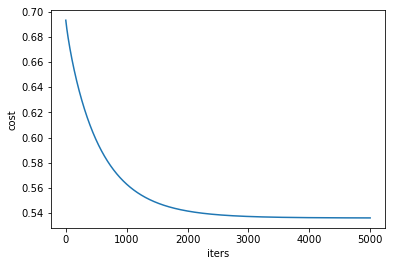

In [125]:
# visualize the cost under each iters
from matplotlib import pyplot as plt
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')
plt.show()

In [126]:
data.iloc[:,:-1].T

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
X_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
X_1,0.051267,-0.092742,-0.213710,-0.375000,-0.513250,-0.524770,-0.398040,-0.305880,0.016705,0.131910,...,-0.611180,-0.663020,-0.599650,-0.726380,-0.830070,-0.720620,-0.593890,-0.484450,-0.006336,0.632650
X_2,0.699560,0.684940,0.692250,0.502190,0.465640,0.209800,0.034357,-0.192250,-0.404240,-0.513890,...,-0.067982,-0.214180,-0.418860,-0.082602,0.312130,0.538740,0.494880,0.999270,0.999270,-0.030612
X_10X_22,0.489384,0.469143,0.479210,0.252195,0.216821,0.044016,0.001180,0.036960,0.163410,0.264083,...,0.004622,0.045873,0.175444,0.006823,0.097425,0.290241,0.244906,0.998541,0.998541,0.000937
X_11X_21,0.035864,-0.063523,-0.147941,-0.188321,-0.238990,-0.110097,-0.013675,0.058805,-0.006753,-0.067787,...,0.041549,0.142006,0.251169,0.060000,-0.259090,-0.388227,-0.293904,-0.484096,-0.006332,-0.019367
X_12X_20,0.002628,0.008601,0.045672,0.140625,0.263426,0.275384,0.158436,0.093563,0.000279,0.017400,...,0.373541,0.439596,0.359580,0.527628,0.689016,0.519293,0.352705,0.234692,0.000040,0.400246


In [127]:
theta_opt

array([[ 1.70383573,  0.667018  ,  1.06295808, -3.50072171, -1.55760897,
        -3.93308021]])

In [128]:
from sympy import *
x1=Symbol('x1')
x2=Symbol('x2')
print (solve([1.70383573+0.667018*x1+1.06295808*x2-3.50072171*(x2**2)-1.55760897*x1*x2-3.93308021*(x1**2)],[x1,x2]))

[{x1: -0.198013883118849*x2 - 3.36345964206078e-9*sqrt(-7.521190201407e+16*x2**2 + 2.09212730201821e+16*x2 + 3.89288619647709e+16) + 0.0847958806311758}, {x1: -0.198013883118849*x2 + 3.36345964206078e-9*sqrt(-7.521190201407e+16*x2**2 + 2.09212730201821e+16*x2 + 3.89288619647709e+16) + 0.0847958806311758}]


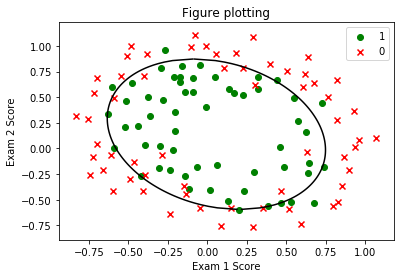

In [161]:
# visualize the decision boundary, using the optimal theta
# plot the initial data
Y_positive = data[data['Y'] == 1]
Y_negative = data[data['Y'] == 0]
plt.scatter(Y_positive['X_1'], Y_positive['X_2'], marker = 'o', color = 'green', label = '1')
plt.scatter(Y_negative['X_1'], Y_negative['X_2'], marker = 'x', color = 'red', label = '0')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(loc = 'upper right')
plt.title('Figure plotting')

# very stupid method to plot the decision boundary :(
x2 = np.linspace(-0.5935, 0.87182,100).tolist()
x1 = [float(-0.198013883118849*x2_- 3.36345964206078e-9*sqrt(-7.521190201407e+16*x2_**2 + 2.09212730201821e+16*x2_ + 3.89288619647709e+16) + 0.0847958806311758) for x2_ in x2]
x11 = [float(-0.198013883118849*x2_+ 3.36345964206078e-9*sqrt(-7.521190201407e+16*x2_**2 + 2.09212730201821e+16*x2_ + 3.89288619647709e+16) + 0.0847958806311758) for x2_ in x2]
plt.plot(x1, x2, color = 'black')
plt.plot(x11, x2,  color = 'black')

plt.show()

In [175]:
# predicted function
def predict_Func(X, theta):
    probability = HFunc(X, theta)
    Y_predict = np.where(probability>=0.5,1,0)
    return Y_predict

# use the training data and the optimal theta to predict the Y
Y_predict = predict_Func(X_train, theta_opt)

accuracy_ = np.mean(Y_predict == Y_train)
print('The accuracy of the logic regression model is:' ,accuracy_)

The accuracy of the logic regression model is: 0.78813559322
